In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('C:/Users/Muhammad Darab/OneDrive/Desktop/Online Course Files/Machine Learning/Data Sets/KMeansClustering/KMeansClustering.csv')
X_ = X.to_numpy()

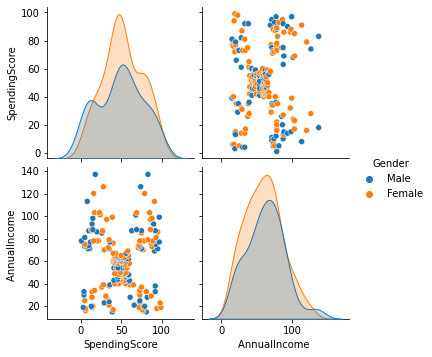

In [3]:
sns.pairplot(X, vars = ['SpendingScore', 'AnnualIncome '], hue = "Gender")

In [4]:
def distFromClus(X, Centroids):
    dist = []
    C = []
    for i in range(len(X)):
        dist = []
        for j in range(len(Centroids)):
            dist.append(np.linalg.norm(X[i] - Centroids[j]))
        C.append(np.argmin(dist))
    return C

In [5]:
def newPosition(X, Centroid, C_, Clusters):
    array = []
    x = (Clusters, )
    Centroid = []
    arr = np.array(np.zeros(x))
    for i in range(len(arr)):
        arr[i] = i
    for i in range(len(arr)):
        array = []
        for j in range(len(C_)):
            if C_[j] == arr[i]:
                array.append(X[j])
        array = np.array(array)
        Centroid.append(np.mean(array, axis = 0))
    return Centroid

In [6]:
def kMeansClustering(X, iterations, Clusters):
    s = (200, 2)
    X_sets = np.array(np.zeros(s))
    for i in range(len(X_)):
        X_sets[i] = np.array((X_[i][4], X_[i][3]))
    Centroids = []
    arr1 = []
    arr = []
    n = 0
    for i in range(len(X_sets)):
        Centroids = np.array((X_sets[i]))
        C = distFromClus(X_sets, Centroids)
        z = 0
        o = 0
        for j in range(len(C)):
            if C[j] == 1:
                z += 1
            else:
                o += 1
        arr.append(abs(z - o))
    for i in range(Clusters):
        n = np.argmin(arr)
        arr1.append(n)
        arr = np.delete(arr, n)
    arr = arr1
    Centroids = []
    for i in range(Clusters):
        Centroids.append((X_sets[arr[i]]))
    for i in range(iterations):
         C = distFromClus(X_sets, Centroids)
         Centroids = newPosition(X_sets, Centroids, C, Clusters)
         Centroids = np.array(Centroids)
    return Centroids, C

In [11]:
Centroids, label = kMeansClustering(X, 50, 5)
label = np.array(label)

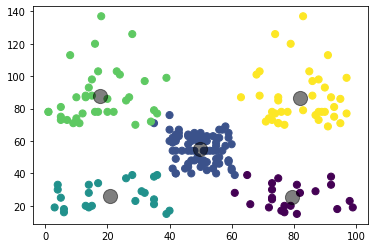

In [12]:
plt.scatter(X_[:,4], X_[:,3], c=label, s=50, cmap='viridis')
plt.scatter(Centroids[:,0], Centroids[:,1], c='black', s=200, alpha=0.5);